# MMM for Pie Sales
[www.vexpower.com](www.vexpower.com)

In [1]:
# Set the right folder

import sys
import os

if not os.path.isdir("mmm"):
    module_path = os.path.abspath(os.path.join('..'))
    if module_path not in sys.path:
        sys.path.append(module_path)

import mmm

In [2]:
import pandas as pd
file_name = "Econometric Model for Pie Sales - Raw Data.csv"
data = pd.read_csv('../data/'+file_name)
data.head()

,Time,"Pie Sales ($1,000s)",Price ($),"Advertising ($1,000s)",Holiday
0,Week 1,350,5.5,3.3,0
1,Week 2,460,7.5,3.3,1
2,Week 3,350,8.0,3.0,0
3,Week 4,430,8.0,4.5,1
4,Week 5,350,6.8,3.0,0


In [3]:
from mmm.clean import make_column_index, rename_column
from mmm.engineer import add_constant

# Clean the data

df = data.copy()

make_column_index(df, 'Time')
rename_column(df, 'Pie Sales ($1,000s)', 'sales')
rename_column(df, 'Price ($)', 'price')
rename_column(df, 'Advertising ($1,000s)', 'ads')
rename_column(df, 'Holiday', 'holiday')

add_constant(df)

df.head()

,sales,price,ads,holiday,constant
Week 1,350,5.5,3.3,0,1
Week 2,460,7.5,3.3,1,1
Week 3,350,8.0,3.0,0,1
Week 4,430,8.0,4.5,1,1
Week 5,350,6.8,3.0,0,1


In [4]:
from mmm.select import get_all_X_labels
from mmm.build import run_regression
from mmm.validate import calculate_r2

# Run Regression Model

y_label = "sales"
X_labels = get_all_X_labels(df, y_label)

y_actual, y_pred, coefficients, p_values = run_regression(df, y_label, X_labels)

r2 = calculate_r2(y_actual, y_pred)

,coefficients,p_values
price,-17.291705,0.027880
ads,16.337767,0.436946
holiday,89.432562,0.000772
constant,415.098517,0.000153


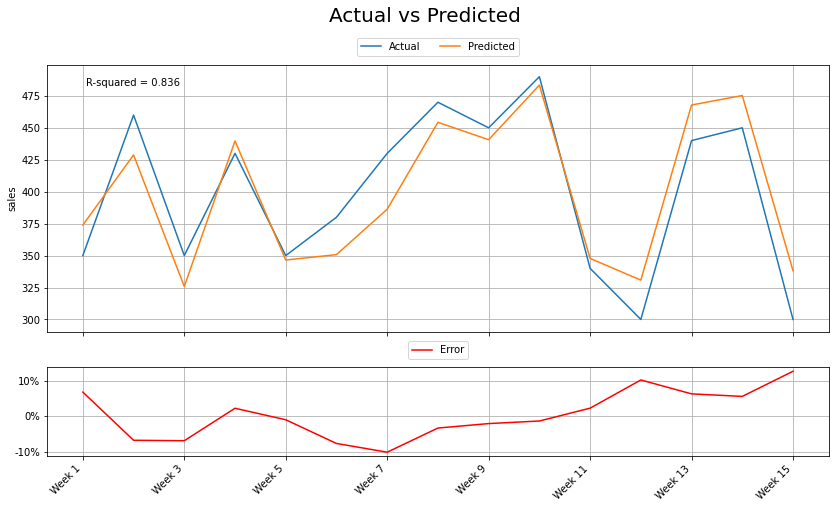

In [5]:
from IPython.display import display
from mmm.build import create_results_df
from mmm.display import display_accuracy_chart

# Display Model Results

results_df = create_results_df(X_labels, coefficients, p_values)
display(results_df)

display_accuracy_chart(y_actual, y_pred, y_label, accuracy=("R-squared", r2))

In [6]:
from mmm.engineer import add_adstocks

# Add adstocks variable
media_column = "ads"
adstock_columns = add_adstocks(df, media_column, adstock_rates=[0.15])
df.head()

,sales,price,ads,holiday,constant,ads AR=0.15
Week 1,350,5.5,3.3,0,1,3.300000
Week 2,460,7.5,3.3,1,1,3.795000
Week 3,350,8.0,3.0,0,1,3.569250
Week 4,430,8.0,4.5,1,1,5.035387
Week 5,350,6.8,3.0,0,1,3.755308


In [7]:
from mmm.select import del_X_labels
from mmm.select import add_X_labels

# Change variables selected

X_labels = del_X_labels(X_labels, [media_column])
X_labels = add_X_labels(X_labels, adstock_columns)
X_labels

['price', 'holiday', 'constant', 'ads AR=0.15']

,coefficients,p_values
price,-17.710259,0.024434
holiday,87.418204,0.000883
constant,399.115569,0.000372
ads AR=0.15,18.877213,0.354514


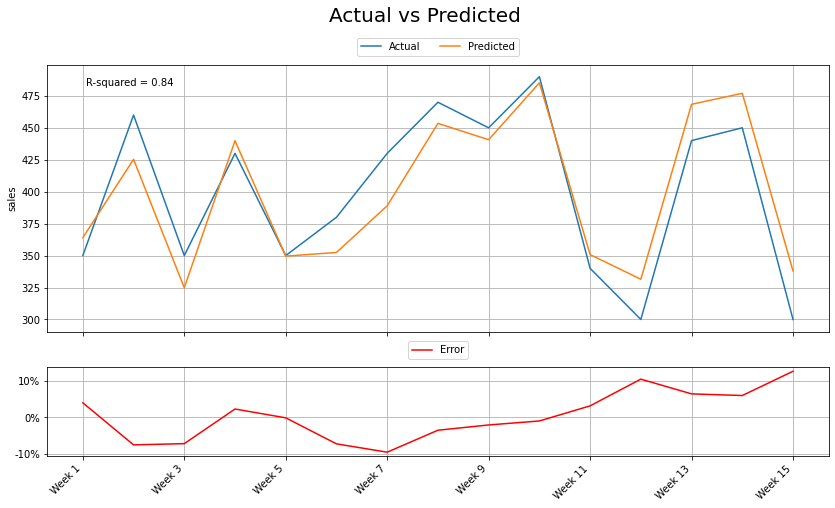

In [8]:
# Run model with adstocked ads

y_actual, y_pred, coefficients, p_values = run_regression(df, y_label, X_labels)

r2 = calculate_r2(y_actual, y_pred)

results_df = create_results_df(X_labels, coefficients, p_values)
display(results_df)

display_accuracy_chart(y_actual, y_pred, y_label, accuracy=("R-squared", r2))